##Introduction
Naive Bayes is a classification algorithm which is based on Bayes theorem with strong and naïve independence assumptions. It simplifies learning by assuming that features are independent of given class.This paper surveys about naïve Bayes algorithm, which describes its concept, hidden naïve Bayes, text classification, traditional naïve Bayes and machine learning. Also represents augmented naïve Bayes by examples. And at the end some applications of naïve Bayes and its advantages and disadvantages has discussed for a better understanding of the algorithm.

##Biomechanical Features of Orthopedic Patients
In this project we are provided with multiple instances of orthopedic parameters and we are also provided with their classification as Normal or Abnormal

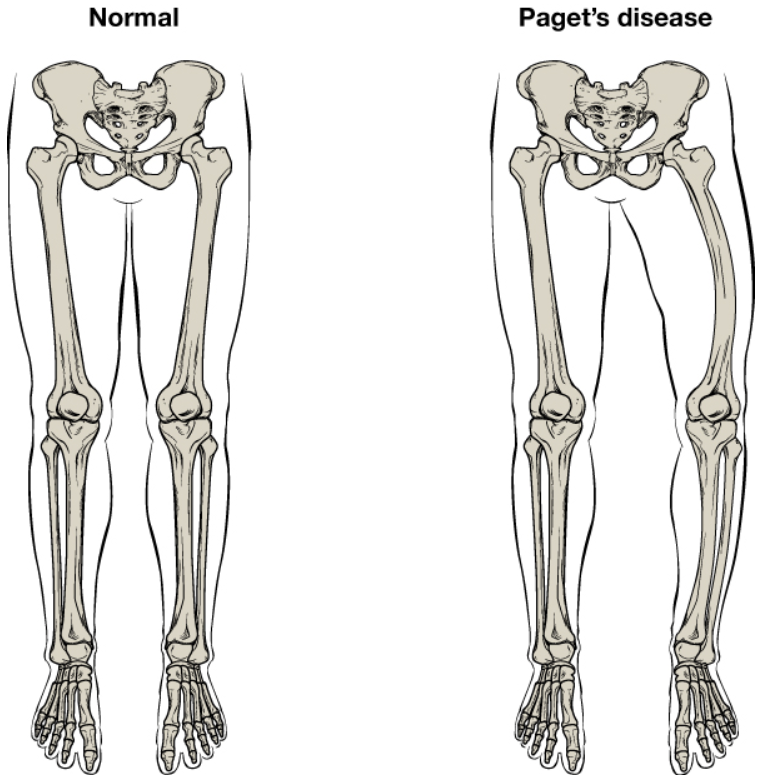

To get started , first download the csv file from this link

We have to implement K Nearest Neighbour, the algorithm is used to classify points according to class of their K nearest neighbour point

And also on the the same dataset Implement a Gaussian Naive Bayes based classifier

Now that you have the dataset , let us get started !

In [50]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)


###Section I : Accessing the Data
1. Make a pandas DataFrame from the CSV
2. How many variables does the dataset contain?
3. What is the data about?
4. What are we trying to predict here?

In [51]:
# 1. Make a pandas DataFrame from the CSV

df = pd.read_csv('/content/drive/MyDrive/Tech I.S/csv files/ortho_knnnb.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [52]:
# 2. How many variables does the dataset contain?

df.columns.unique()

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

Independant variables (features) = pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis

Dependant variable (features) = class

3) Data has multiple instances of orthopedic parameters and classification as Normal or Abnormal. 

4) Predict if a patient is normal or abnormal.

##Section II : Exploratory Data Analysis
1. Perform some descriptive statistics and make a note of your findings
2. Plot appropriate graphs to understand the relation between the variables.
3. Point out any observations and comment on the strength of the relationships if any.

In [53]:
#1. Perform some descriptive statistics and make a note of your findings

df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


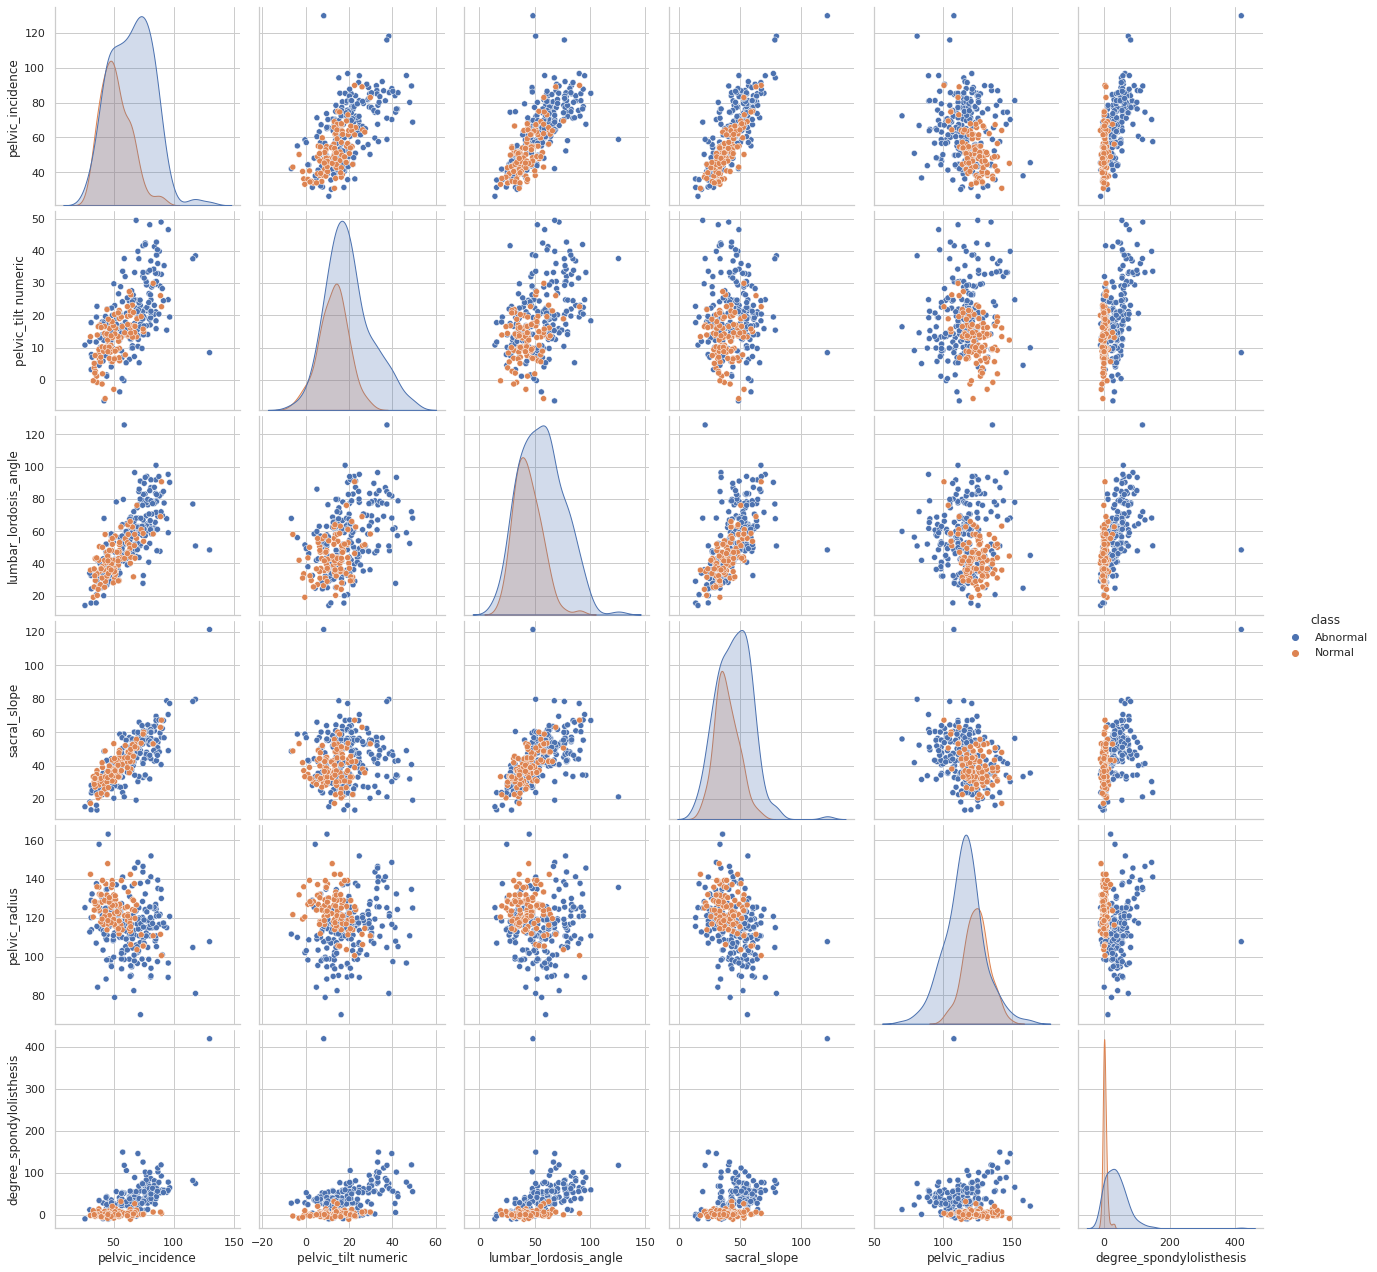

In [54]:
#2. Plot appropriate graphs to understand the relation between the variables.

sns.set_style("whitegrid");
sns.pairplot(df, hue="class", size=3);
plt.show()

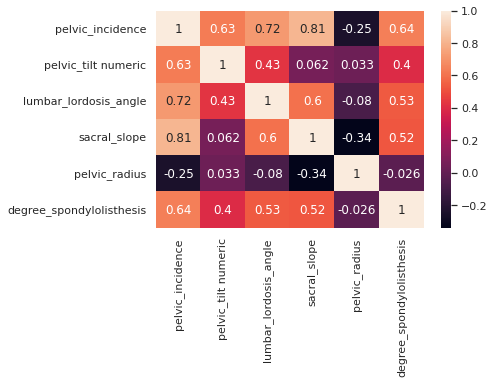

In [55]:
#3. Point out any observations and comment on the strength of the relationships if any.

corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

3) From the above graph, pelvic incidence is hightly correlated with sacral slope. 

##Section III : Prepare data for Training!
1. Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column
2. Split the entire dataset into independent features and symptoms as the response variable
3. Normalize the variables.

In [56]:
#1. Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column

df['symptom_class']=df['class'].replace({"Abnormal":1, 'Normal':0})
df.drop(['class'],axis=1,inplace=True)

In [57]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [58]:
#2. Split the entire dataset into independent features and symptoms as the response variable

x = df.drop(['symptom_class'],axis=1)
y = df['symptom_class']

3) Normalize the variables.

In [59]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


x_scaled= x-xmin/(xmax-xmin)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
X_scaled=scaled.fit_transform(x)

In [61]:
X_scaled

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

##Section IV : Training with KNN
1) Use train_test_split from sklearn and split the parameters and classes into train and test sets

2) Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.

3) Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.

4) Evaluate your final model using appropriate metrics for classification and comment on them.

1) Use train_test_split from sklearn and split the parameters and classes into train and test sets

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size=.2)

 2) Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.

In [63]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
pred_train = KNN.predict(x_train)

In [65]:
accuracy = accuracy_score(pred_train,y_train)
print("Train Accuracy",round(accuracy*100,2),"%")

Train Accuracy 89.92 %


In [66]:
pred_test=KNN.predict(x_test)
accuracy_test=accuracy_score(pred_test,y_test)

In [67]:
from sklearn.metrics import classification_report,accuracy_score
print("Train Accuracy",round(accuracy_test*100,2),"%")

Train Accuracy 74.19 %


3.Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.

In [88]:
train_accuracy = []
test_accuracy = []

for k in range(3,16):
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)

  train_pred = KNN.predict(x_train)
  train_score1 = accuracy_score(train_pred, y_train)
  train_accuracy.append(train_score1)

  test_pred = KNN.predict(x_test)
  test_score1 = accuracy_score(test_pred, y_test)
  test_accuracy.append(test_score1)
  #print(test_accuracy,k)

print("Best accuracy is {} with K = {}".format(max(test_accuracy),3+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.7903225806451613 with K = 7


4) Evaluate your final model using appropriate metrics for classification and comment on them.

In [116]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)
predfinal = KNN.predict(x_test)

print("The accuracy score is:", round(accuracy_score(y_test, predfinal)*100,2),'%')

The accuracy score is: 79.03 %


##Section V : Training with Naive Bayes
1) Now , fit a Naive Bayes Classifier to the same data.

2) Train a NB model with default arguments and make a note of training and test metrics

3) What are your inferences on the relative performance between the KNN and NB based models?

4) Which of these models would you recommend and with what reasons ?

1) Now , fit a Naive Bayes Classifier to the same data.

In [69]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB()

2) Train a NB model with default arguments and make a note of training and test metrics

In [70]:
# Predicting the test results
y_pred = nvclassifier.predict(x_test)

In [117]:
accuracy_nv=accuracy_score(y_test, y_pred)
print("The accuracy score is:", round(accuracy*100,2),'%')

The accuracy score is: 89.92 %


In [110]:
# Comparing the actual and predicted vaues

result=pd.DataFrame({"y_test":y_test,"prediction":y_pred}).reset_index()
result.drop(['index'],axis=1,inplace=True)
result

,y_test,prediction
0,0,0
1,1,1
2,0,0
3,0,1
4,1,1
...,...,...
57,1,1
58,1,1
59,1,1
60,1,0


3) What are your inferences on the relative performance between the KNN and NB based models?

NB gave best accuracy score.

4) Which of these models would you recommend and with what reasons ?

I would recommend NB because of the best accuracy score